# Project: **PolynomialFeature of Scikit-learn**

## Group members
* Yichuan Su : yisu0279@colorado.edu
* Zongyi Huang : zohu7459@colorado.edu
* Tiancheng Shao: tish1781@colorado.edu
* Jonathan Meade : jome4701@colorado.edu

Topic from Yichuan's individual project. <br>
Link to the original project: https://github.com/cu-numcomp/numcomp-project-Suyichuan98 <br>
Open source software link: https://github.com/scikit-learn/scikit-learn, author: Google Summer of Code project group <br>


#### You can run shell commands:

In [3]:
!pip3 install sklearn


## Introduction

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]. High degrees can cause overfitting. Since scikit-learn does not directly implement the class about Polynomia Regression, we need change convert our feature into Polynmomia feature and then use linear regression model to train on the features.

### Polynomial Feature Class Examples
Generate polynomial and interaction features. <br>
class sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order='C')

In [ ]:
>>> import numpy as np
>>> from sklearn.preprocessing import PolynomialFeatures
>>> X = np.arange(6).reshape(3, 2)
>>> X
array([[0, 1],
       [2, 3],
       [4, 5]])
>>> poly = PolynomialFeatures(2)
>>> poly.fit_transform(X)
array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])
>>> poly = PolynomialFeatures(interaction_only=True)
>>> poly.fit_transform(X)
array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [ ]:
>>> from sklearn.preprocessing import PolynomialFeatures
>>> from sklearn.linear_model import LinearRegression
>>> from sklearn.pipeline import Pipeline
>>> import numpy as np
    # use pipeline to construct model
>>> model = Pipeline([('poly', PolynomialFeatures(degree=3)),
...                   ('linear', LinearRegression(fit_intercept=False))])
>>> # fit to an order-3 polynomial data
>>> x = np.arange(5)
>>> y = 3 - 2 * x + x ** 2 - x ** 3
>>> model = model.fit(x[:, np.newaxis], y)
>>> model.named_steps['linear'].coef_
array([ 3., -2.,  1., -1.])

## Methods

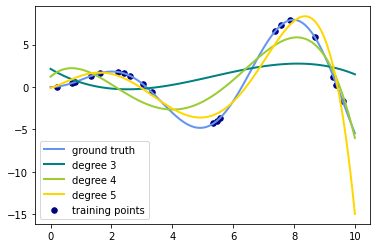

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

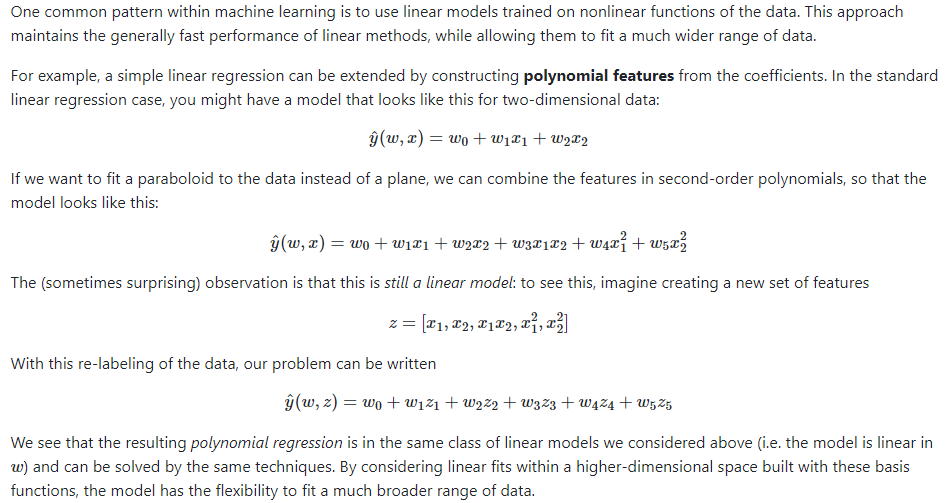

In [7]:
from IPython.display import Image
Image(filename = "TeamProject1.png",width = 800,height = 500)

## Results and interpretation

As we see, when a ploynomial has much higher order degree, the plot of this function will converge to the function we estimate.

## Try to Break

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([10, 15, 20]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44584e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


<Figure size 640x480 with 1 Axes>

## Results and interpretation
At this point, I am tring to increasing the degree of order.I find that the polynomial no longer converge to the sin(x)function.

## Conclusions and open questions

We have to notice the overfitting problem when using the polynomial feature. The higher the degree the higher the accuracy is, a linear function (polynomial with degree 1) is underfitting, but for higher degrees the model will overfit the expect data.

Meanwhile, a higher order polynomial is huge. If I have 100 nodes then it will be a 99th degree polynomial. The values are unpredictable and will be wildly inaccurate between nodes.

Compare to linear approximation and spline technique, polynomial interpolation has its own advantage, what can we do to improve it?